In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/disney-movies-dataset/disney movie total gross.csv')
# 日付を適切な形式に変換
df['Date Released'] = pd.to_datetime(df['Date Released'], format='%d/%m/%Y')
df

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


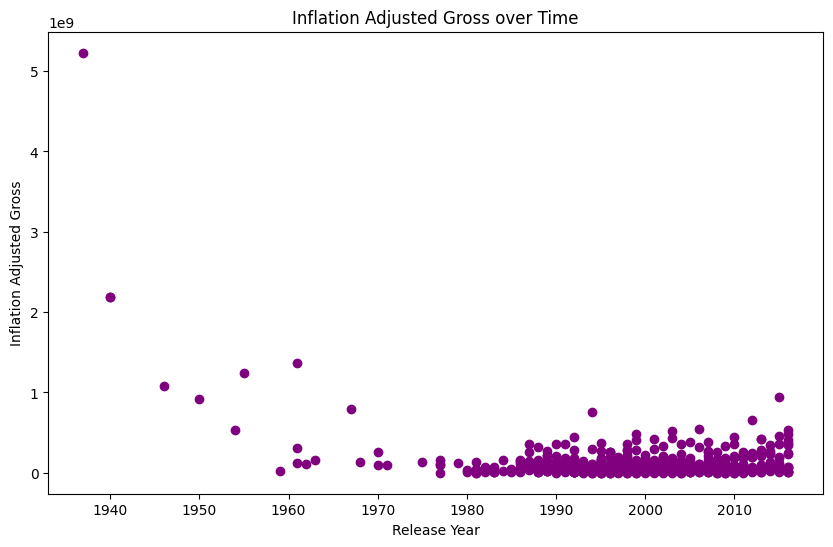

In [3]:
df['Release Year'] = df['Date Released'].dt.year

# 公開年とインフレ調整後収益をプロット
plt.figure(figsize=(10,6))
plt.scatter(df['Release Year'], df['Inflation Adjusted Gross'], color='purple')
plt.title('Inflation Adjusted Gross over Time')
plt.xlabel('Release Year')
plt.ylabel('Inflation Adjusted Gross')
plt.show()

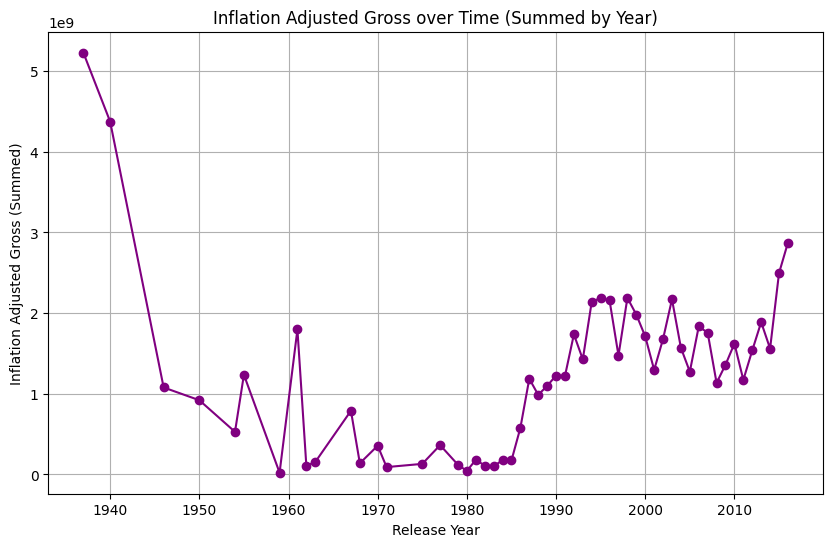

In [4]:
# 公開年ごとにインフレ調整後収益を合算
df['Release Year'] = df['Date Released'].dt.year
grouped_df = df.groupby('Release Year')['Inflation Adjusted Gross'].sum().reset_index()

# 折れ線グラフのプロット
plt.figure(figsize=(10,6))
plt.plot(grouped_df['Release Year'], grouped_df['Inflation Adjusted Gross'], color='purple', marker='o')
plt.title('Inflation Adjusted Gross over Time (Summed by Year)')
plt.xlabel('Release Year')
plt.ylabel('Inflation Adjusted Gross (Summed)')
plt.grid(True)
plt.show()

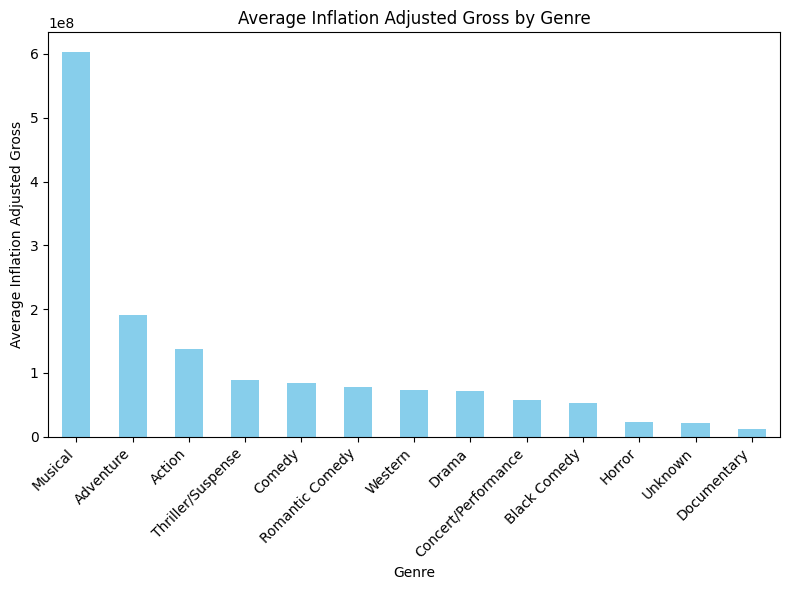

In [5]:
# ジャンルごとのインフレ調整後収益の平均を計算し、大きい順にソート
genre_group = df.groupby('Genre')['Inflation Adjusted Gross'].mean().sort_values(ascending=False)

# グラフで表示
genre_group.plot(kind='bar', color='skyblue', figsize=(8,6))
plt.title('Average Inflation Adjusted Gross by Genre')
plt.ylabel('Average Inflation Adjusted Gross')
plt.xticks(rotation=45, ha='right')  # 文字を斜めにし、右寄せにする
plt.tight_layout()  # レイアウトの調整
plt.show()